### Implementing the background correction functions

This notebook provides a step-by-step guide for implementing the background correction functions

@author: Alexandros Papagiannakis, HHMI at Stanford University, Jan 11 2025

Cite: https://www.biorxiv.org/content/10.1101/2024.10.08.617237v2.full

    DNA/polysome phase separation and cell width confinement couple nucleoid segregation 
    to cell growth in Escherichia coli

    Alexandros Papagiannakis, Qiwei Yu, Sander K. Govers, Wei-Hsiang Lin,  Ned S. Wingreen, Christine Jacobs-Wagner

    bioRxiv, https://doi.org/10.1101/2024.10.08.617237, October 22, 2024

In [10]:
# definition of function paths and importing libraries
import sys
sys.path.append('.../Image-analysis')
import nd2_to_array as ndtwo
import background_correction as bkg
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [11]:
# reading images
phase_image_read = ndtwo.nd2_to_array('...phase_image_path.nd2')
fluor_image_read = ndtwo.nd2_to_array('...fluor_image_path.nd2')

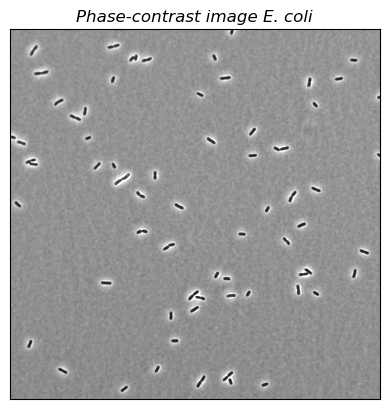

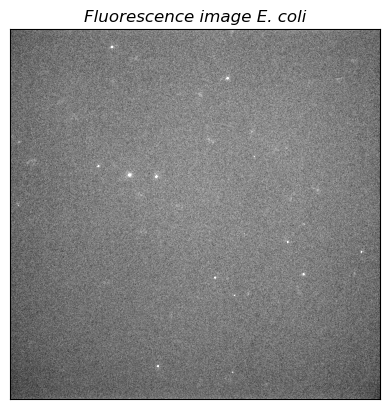

In [12]:
# showing the image examples
phase_image = phase_image_read[2]
fluor_image = fluor_image_read[2]

def plot_image(img, int_range, title_string):
    plt.title(title_string, fontsize=12, style='italic')
    plt.imshow(img, cmap='gray', vmin=int_range[0], vmax=int_range[1])
    plt.xticks([])
    plt.yticks([])
    plt.show()

plot_image(phase_image, (500,10000), 'Phase-contrast image E. coli')
plot_image(fluor_image, (150,200), 'Fluorescence image E. coli')

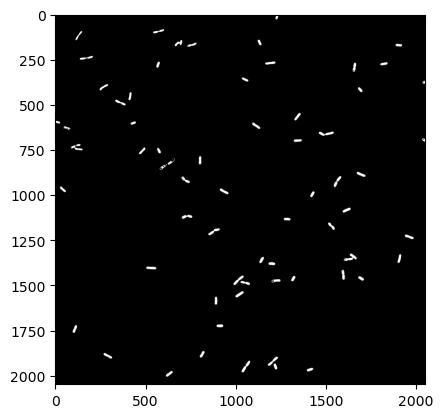

In [13]:
# getting the inverted phase-contrast mask

phase_mask = bkg.get_inverted_mask(phase_image)

plt.imshow(phase_mask, cmap='gray')
plt.show()

Subtracting background...


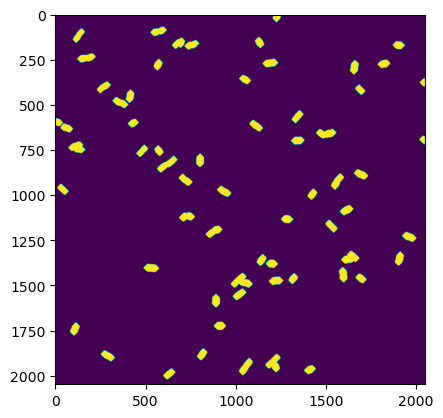

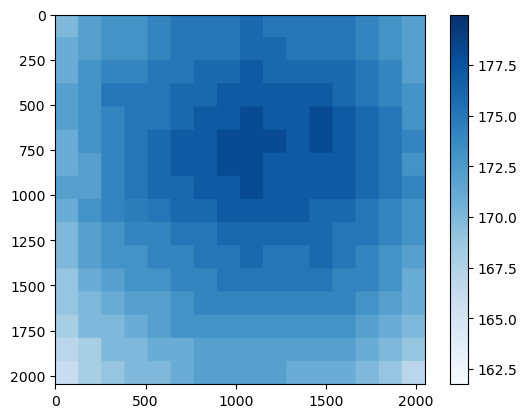

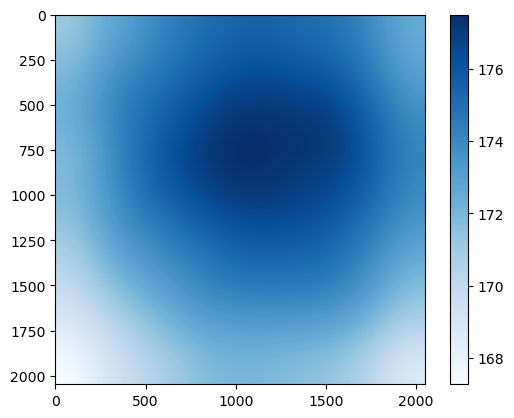

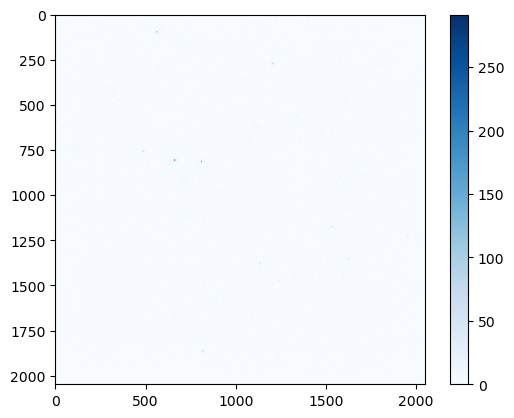

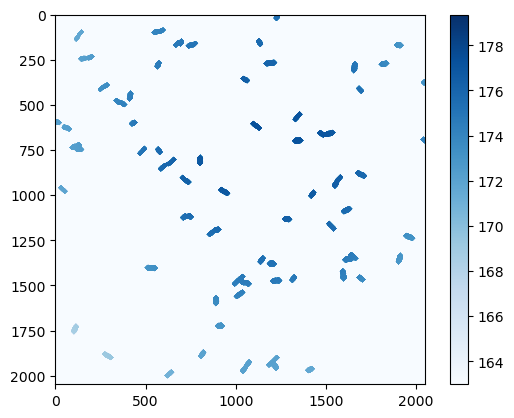

In [14]:
# background estimation and subtraction
bkg_results = bkg.back_sub(fluor_image, phase_mask, dilation=15, estimation_step=128, smoothing_sigma=150, show=True)